# Predictive Maintenace
Goal is to predict before something goes wrong, so some maintanance can happen and the potential problem is averted

Using data from https://www.kaggle.com/nphantawee/pump-sensor-data

By Alex Dance

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

%matplotlib inline

CHOOSE DATA SET

In [2]:
oringal_df = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Predictive Maintenance/sensor.csv')
oringal_df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


# Choose Second Dataset

In [3]:
dfb = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Predictive Maintenance/sensor.csv', index_col = "timestamp",parse_dates=["timestamp"])

In [4]:
df = oringal_df

# Work with Data to look at failure points

In [5]:
df_f = pd.read_csv(r'C:/Users/sasha/Alex_Python_Folder/Predictive Maintenance/sensor.csv')

In [6]:
fails = df_f.loc[df_f['machine_status'] == 'BROKEN'].index

In [7]:
failures_timestamps = list()

In [8]:
print(fails)

Int64Index([17155, 24510, 69318, 77790, 128040, 141131, 166440], dtype='int64')


In [9]:
failures_timestamps = df_f.loc[fails,'timestamp']

In [10]:
print(failures_timestamps)

17155     2018-04-12 21:55:00
24510     2018-04-18 00:30:00
69318     2018-05-19 03:18:00
77790     2018-05-25 00:30:00
128040    2018-06-28 22:00:00
141131    2018-07-08 00:11:00
166440    2018-07-25 14:00:00
Name: timestamp, dtype: object


In [11]:
prefailures =[]

In [12]:
for i in range(0,7,1): 
    print(failures_timestamps.index[i])

17155
24510
69318
77790
128040
141131
166440


In [13]:
extend_failures = list()
prefailures = failures_timestamps
for i in range(0,7,1): # 7 is the number of errors
    extend_failures.append(prefailures.index[i])
    for k in range(1,10,1):  # 10 is the number of steps beforehand to look at
        newcount = prefailures.index[i] - k
        extend_failures.append(newcount)

In [14]:
print(extend_failures)

[17155, 17154, 17153, 17152, 17151, 17150, 17149, 17148, 17147, 17146, 24510, 24509, 24508, 24507, 24506, 24505, 24504, 24503, 24502, 24501, 69318, 69317, 69316, 69315, 69314, 69313, 69312, 69311, 69310, 69309, 77790, 77789, 77788, 77787, 77786, 77785, 77784, 77783, 77782, 77781, 128040, 128039, 128038, 128037, 128036, 128035, 128034, 128033, 128032, 128031, 141131, 141130, 141129, 141128, 141127, 141126, 141125, 141124, 141123, 141122, 166440, 166439, 166438, 166437, 166436, 166435, 166434, 166433, 166432, 166431]


In [15]:
len_extend_failures = len(extend_failures)
print(len_extend_failures)

70


# Next Step - furher analysis with this index data

In [16]:
data_for_extended_failures = []

In [17]:
print(type(data_for_extended_failures))

<class 'list'>


# EDA

In [18]:
#!pip install pandas_profiling

In [19]:
#import pandas_profiling

In [20]:
# pandas_profiling.ProfileReport(oringal_df.reset_index())#, check_correlation=True)

In [21]:
oringal_df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [22]:
df= oringal_df

In [23]:
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [24]:
df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


# Cleaning

In [25]:
df = pd.get_dummies(data = oringal_df, columns = ['machine_status'], prefix = ['machine_status' ])
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,1,0
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,1,0
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,1,0


In [26]:
# Deleting Data that is wrong

In [27]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [28]:
df.drop('sensor_15',axis=1,inplace=True)

# Check Correlation

In [29]:
temp = df.corr()
#print(temp)

C:\Users\sasha\AppData\Local\Temp\ipykernel_2924\2992599162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = df.corr()


In [30]:
type(temp)

pandas.core.frame.DataFrame

In [31]:
temp2 = df.corr()

C:\Users\sasha\AppData\Local\Temp\ipykernel_2924\3454734905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp2 = df.corr()


In [32]:
#print(temp2)

<Axes: >

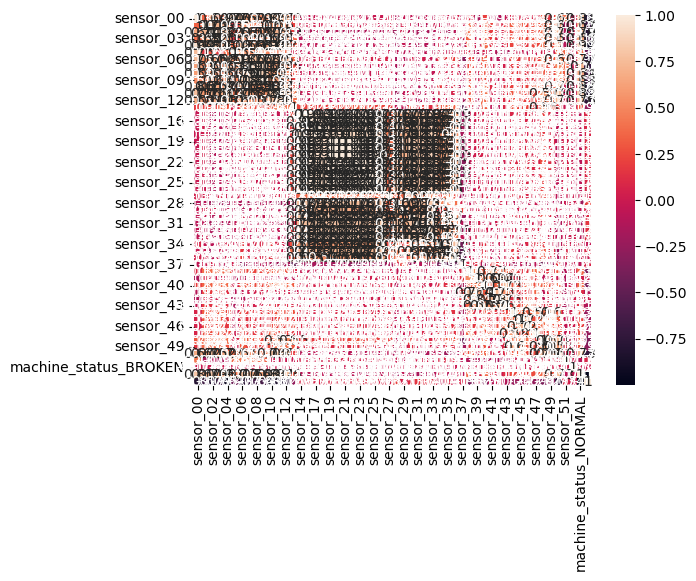

In [33]:
import seaborn as sns
sns.heatmap(temp, annot = True) 

# See date Range

In [34]:
df = df.sort_values(by='timestamp')
# Start 1 April 2018 end 30 Aug 2018
#5 months

In [35]:
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,1,0
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,1,0
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,1,0


In [36]:
df.tail()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,...,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,0,1,0
220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,...,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,0,1,0
220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,...,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,0,1,0
220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,...,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,0,1,0
220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,15.65393,...,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,0,1,0


# Make Date the Index

In [37]:
df = df.set_index('timestamp')

In [38]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,1,0
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,1,0
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,1,0


# Further EDA

In [39]:
df.nunique()

sensor_00                      1253
sensor_01                       831
sensor_02                       831
sensor_03                       588
sensor_04                      7844
sensor_05                    190751
sensor_06                       812
sensor_07                       531
sensor_08                       626
sensor_09                       565
sensor_10                    198804
sensor_11                    196368
sensor_12                    187145
sensor_13                    191983
sensor_14                     94564
sensor_16                    110522
sensor_17                    148000
sensor_18                    152603
sensor_19                    100422
sensor_20                     92129
sensor_21                    131083
sensor_22                    126401
sensor_23                    119286
sensor_24                    133778
sensor_25                    165999
sensor_26                    179718
sensor_27                    203198
sensor_28                   

# Prepare for Logistic regression

In [40]:
# reduceddf = df  #to goet all X Values and not Y so date is not the index
newdf = df  #to goet all X Values and not Y

# Initial Logistic Regression

In [41]:
newdf.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,1,0
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,1,0
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,1,0


In [42]:
y = newdf['machine_status_BROKEN']

In [43]:
y.value_counts()

0    220313
1         7
Name: machine_status_BROKEN, dtype: int64

In [44]:
newdf= newdf.drop("machine_status_BROKEN",axis=1)  #, inplace = True) ## new

In [45]:
#newdf.drop("machine_status_BROKEN",axis=1)  #, inplace = True)

In [46]:
newdf.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_NORMAL,machine_status_RECOVERING
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1,0
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1,0
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1,0
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1,0
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1,0


In [47]:
newdf['sensor_00'] = df['sensor_00'].fillna(0)

In [48]:
newdf = newdf.fillna(0)

In [49]:
X = newdf[['sensor_00']]#.values.reshape(-1,1)
#X = newdf#.values.reshape(-1,1)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)

In [52]:
X_reshape = X.values.reshape(-1,1)

In [53]:
X_train_reshape, X_test_reshape, y_train_reshape, y_test_reshape = train_test_split(X_reshape, y, test_size=0.50, random_state=1)

In [54]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,1,0
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,1,0
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,1,0
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,1,0


In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
#model.fit(X, y)
model.fit(X_train, y_train)


LogisticRegression()

In [58]:
accuracy_score = model.score(X, y)

print(accuracy_score)

0.9999682280319535


In [59]:
accuracy_score = model.score(X_test, y_test)
#predict = model.predict()
print(accuracy_score)

0.9999727668845316


In [60]:
print(model.coef_)
print(model.intercept_)

[[-1.13134343]]
[-8.18414839]


In [61]:
y_pred = model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
# ANSWER
# True positive: (upper-left) – Number of positives we predicted correctly
# True negative: (lower-right) – Number of negatives we predicted correctly
# False positive: (top-right) – Number of positives we predicted wrongly
# False negative: (lower-left) – Number of negatives we predicted wrongly

In [63]:
confusion_matrix(y_test, y_pred)

array([[110157,      0],
       [     3,      0]], dtype=int64)

Calculaitons for Logistic regression

In [64]:
recall_score(y_test, y_pred)

0.0

In [65]:
precision_score(y_test, y_pred)

C:\Users\sasha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [66]:
y_test.value_counts()

0    110157
1         3
Name: machine_status_BROKEN, dtype: int64

# Other

In [67]:
reduceddf = oringal_df # had to do orignnal df so could go through data using the index

In [68]:
reduceddf.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


#Reverse Order

In [69]:
reduceddf = reduceddf.sort_values(by='timestamp', ascending=[False])

In [70]:
reduceddf = pd.get_dummies(data = reduceddf, columns = ['machine_status'], prefix = ['machine_status' ])

In [71]:
reduceddf.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,0,1,0
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,0,1,0
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,0,1,0
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,0,1,0
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,0,1,0


In [72]:
reduceddf['TimeSince'] = 9999999 

In [73]:
reduceddf.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING,TimeSince
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,0,1,0,9999999
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,0,1,0,9999999
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,0,1,0,9999999
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,0,1,0,9999999
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,0,1,0,9999999


In [74]:
reduceddf.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING,TimeSince
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,0,1,0,9999999
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,0,1,0,9999999
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,0,1,0,9999999
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,0,1,0,9999999
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,0,1,0,9999999


In [75]:
print(len(reduceddf))

220320


In [76]:
reduceddf.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING,TimeSince
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,0,1,0,9999999
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,0,1,0,9999999
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,0,1,0,9999999
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,0,1,0,9999999
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,0,1,0,9999999


In [77]:
# going backwards
counter = 9999999
lenrange = 1000 #Could be len(reduceddf) but that is too long and it fails
for i in range(1000,1,-1):  # start from the end and go backwards # ie when get an error look at the time frame beforehand
    if reduceddf.loc[i, "machine_status_BROKEN"] > 0:
        print("aa")
        counter = 0 
    if counter > 1000:
        reduceddf.loc[i, "TimeSince"] = 999
    else:
        reduceddf.loc[i, "TimeSince"] = counter
    counter = counter +1

In [78]:
reduceddf.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status_BROKEN,machine_status_NORMAL,machine_status_RECOVERING,TimeSince
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,0,1,0,9999999
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,0,1,0,9999999
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,0,1,0,9999999
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,0,1,0,9999999
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,0,1,0,9999999


In [79]:
# This shows 
reduceddf['TimeSince'].value_counts()

9999999    219321
999           999
Name: TimeSince, dtype: int64

In [80]:
# Later can delete all the large numbers 

In [81]:
indexNames = reduceddf[ reduceddf['machine_status_RECOVERING'] == 1 ].index  # nothing ever went wrong in the recovering items so ignore that for analysis